In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\Abinay Rachakonda\Downloads\archive (2)\winequality-red.csv")

In [12]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [13]:
df.shape

(1599, 12)

In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Data cleaning

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [19]:
df.duplicated().sum()

240

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(1359, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


# non_visual analysis

In [56]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [57]:
def numerical_univariate_analysis(numerical_data):
  for col_name in numerical_data:
    print("*"*10, col_name, "*"*10)
    print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std','skew','kurt']))
    print()

In [58]:
numerical_univariate_analysis(numerical_df)

********** fixed acidity **********
min        4.600000
max       15.900000
mean       8.319637
median     7.900000
std        1.741096
skew       0.982751
kurt       1.132143
Name: fixed acidity, dtype: float64

********** volatile acidity **********
min       0.120000
max       1.580000
mean      0.527821
median    0.520000
std       0.179060
skew      0.671593
kurt      1.225542
Name: volatile acidity, dtype: float64

********** citric acid **********
min       0.000000
max       1.000000
mean      0.270976
median    0.260000
std       0.194801
skew      0.318337
kurt     -0.788998
Name: citric acid, dtype: float64

********** residual sugar **********
min        0.900000
max       15.500000
mean       2.538806
median     2.200000
std        1.409928
skew       4.540655
kurt      28.617595
Name: residual sugar, dtype: float64

********** chlorides **********
min        0.012000
max        0.611000
mean       0.087467
median     0.079000
std        0.047065
skew       5.680347
kurt  

# Data visual analysis

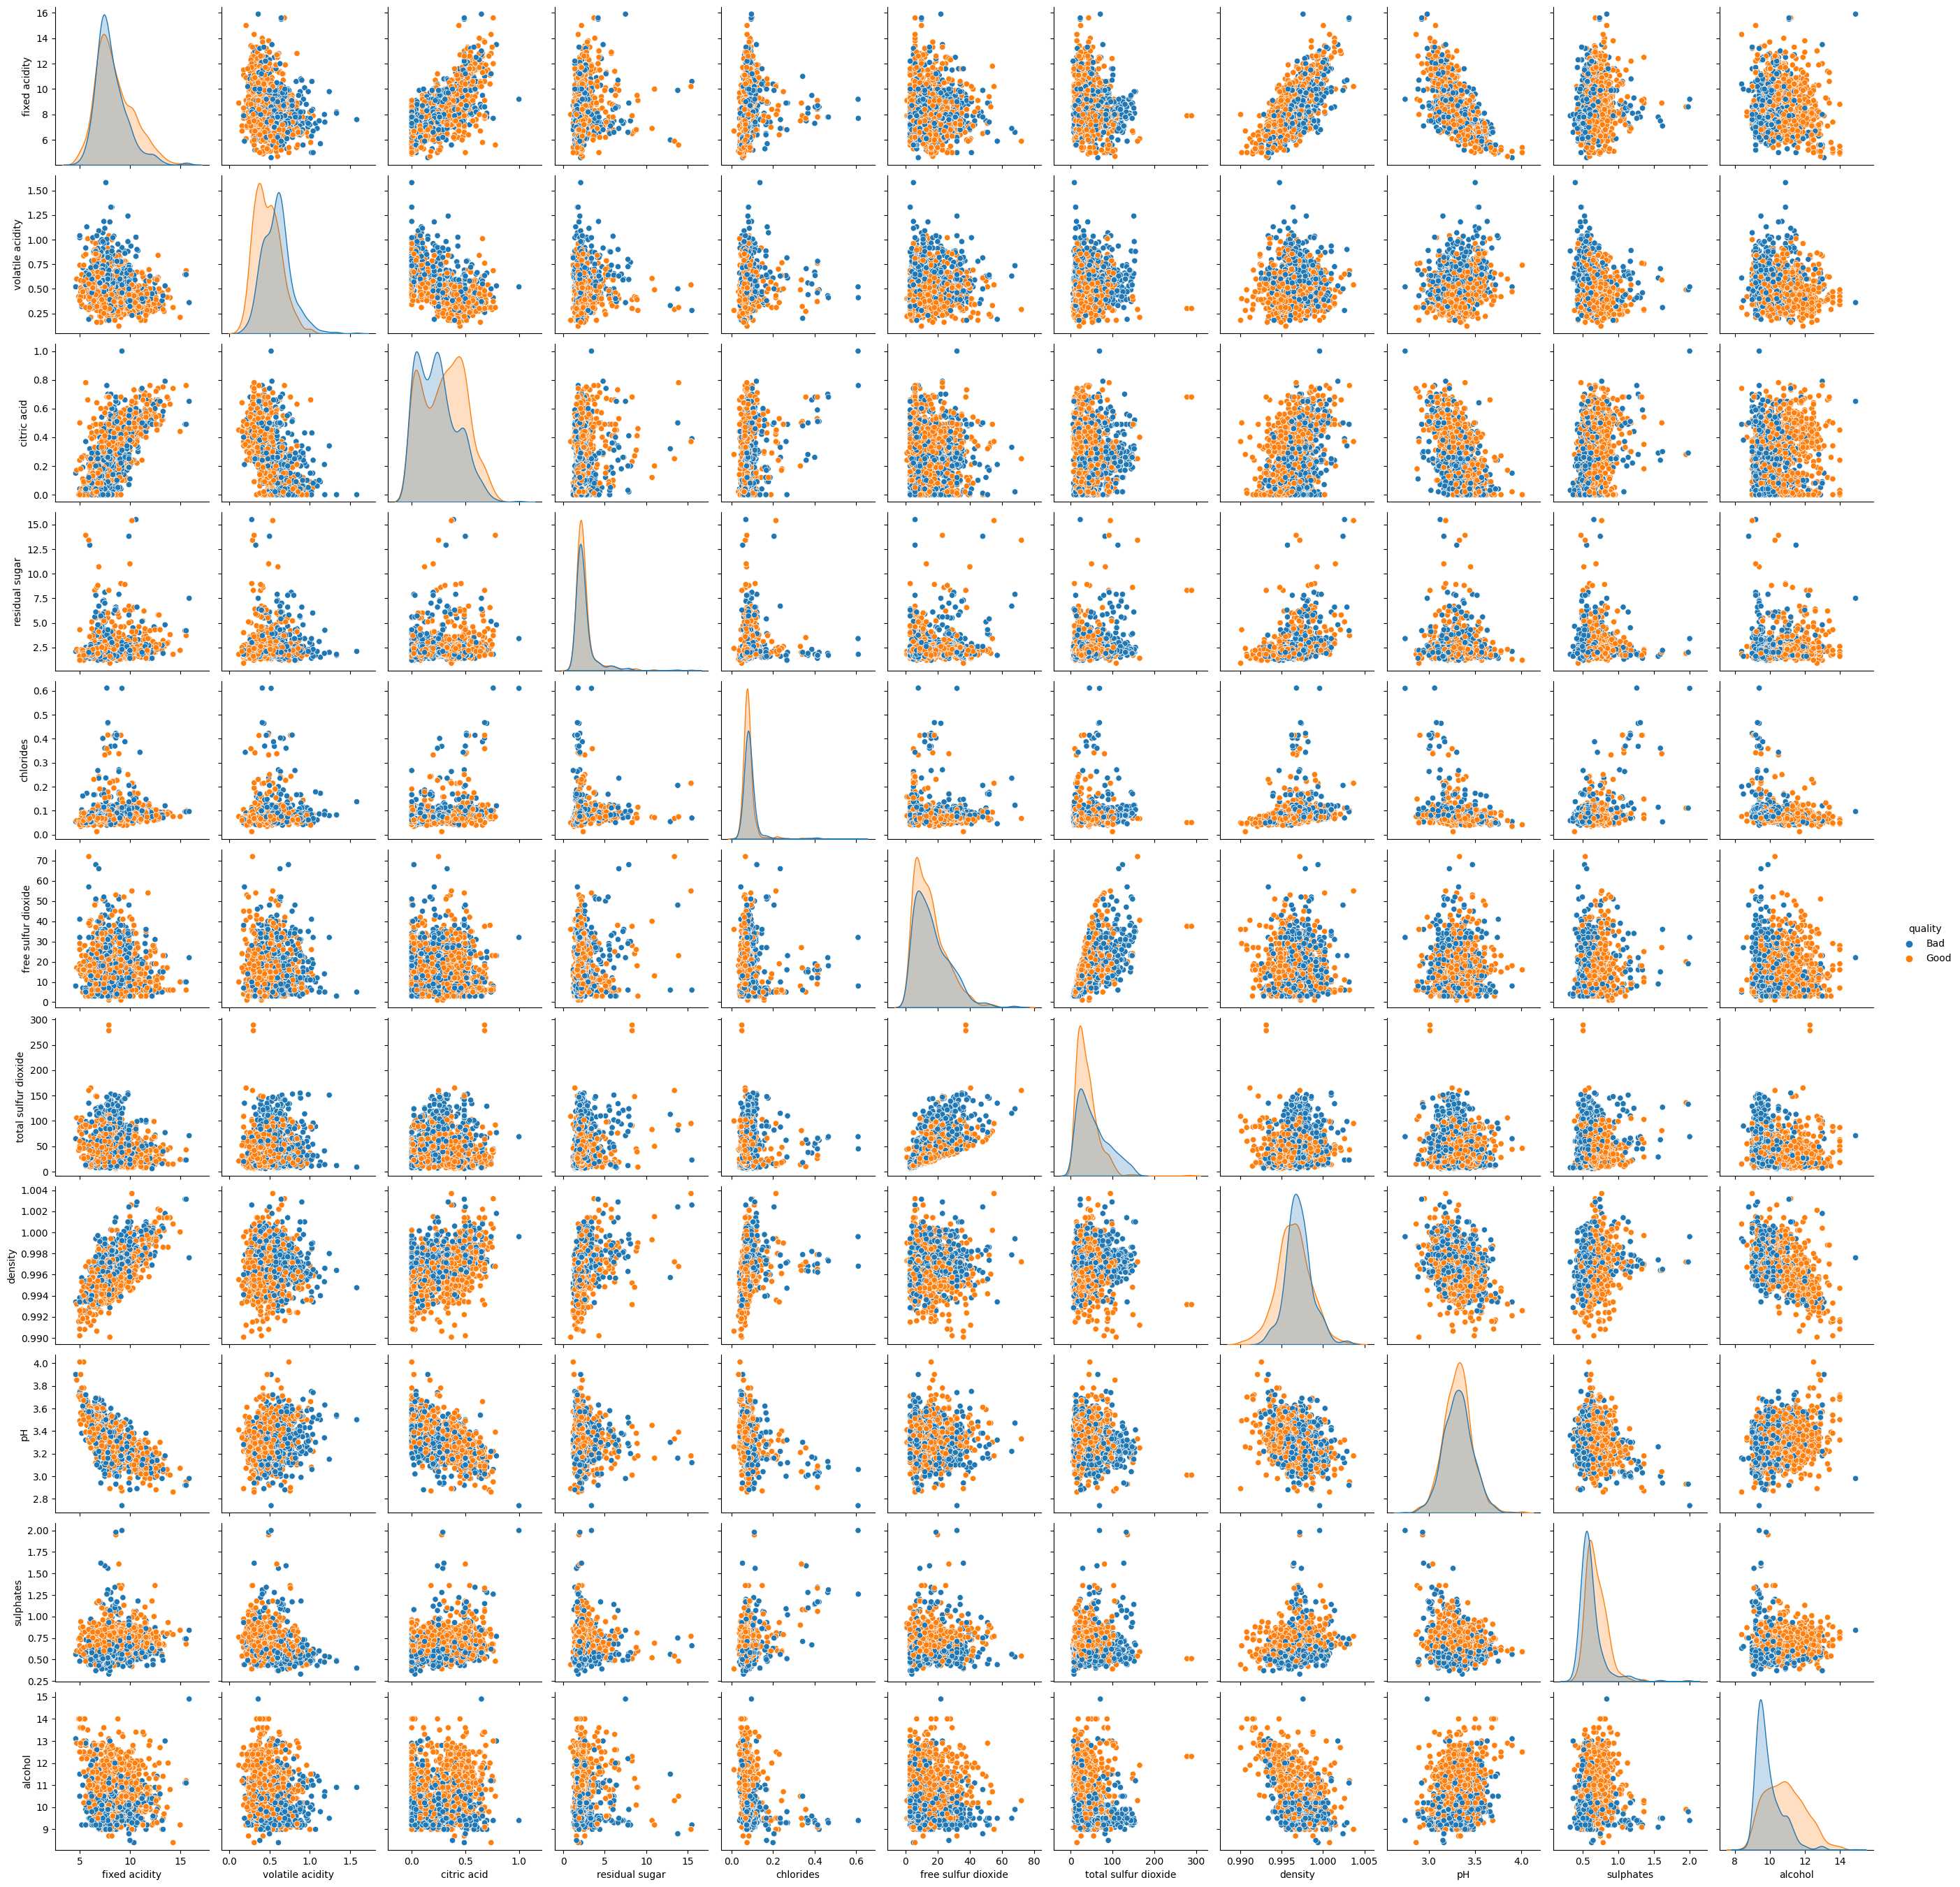

In [70]:
sns.pairplot(df, hue = 'quality')

In [17]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

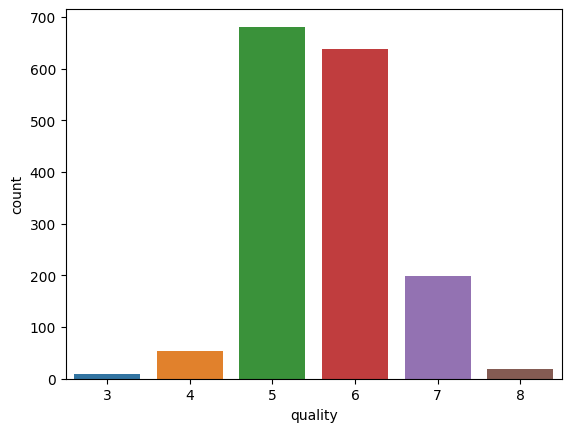

In [18]:
sns.countplot(data=df,x='quality')

In [32]:
df['quality'] = df['quality'].map(lambda val: 'Good' if val>=6 else 'Bad')

<AxesSubplot:xlabel='quality', ylabel='count'>

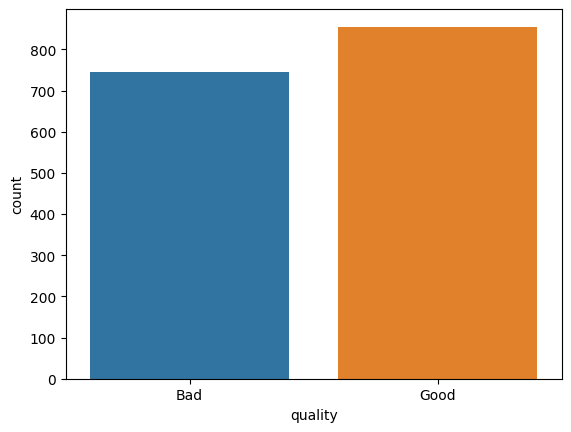

In [42]:
sns.countplot(data=df,x='quality')

In [59]:
df['quality'].value_counts()

Good    855
Bad     744
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

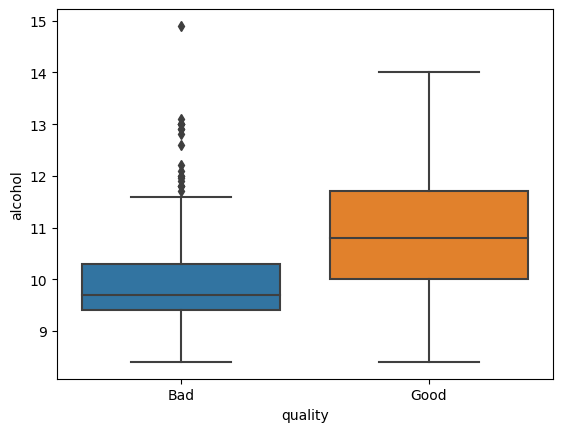

In [34]:
sns.boxplot(data=df,x='quality',y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

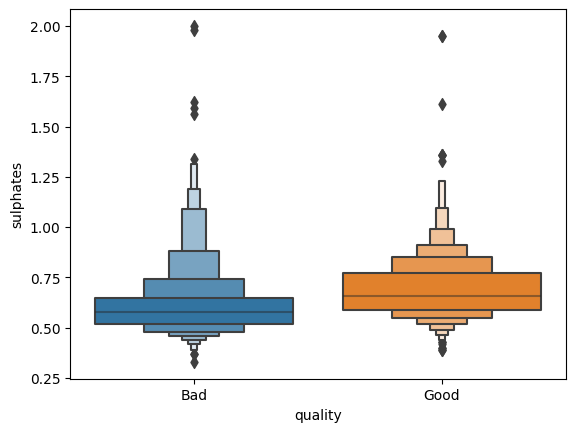

In [37]:
sns.boxenplot(data=df,x='quality',y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

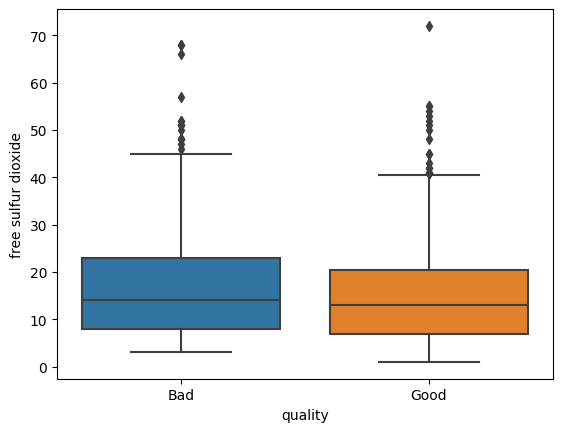

In [55]:
sns.boxplot(data=df,x='quality',y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

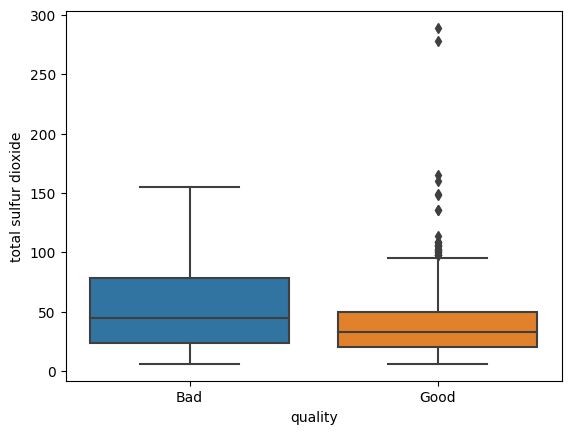

In [41]:
sns.boxplot(data=df,x='quality',y='total sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

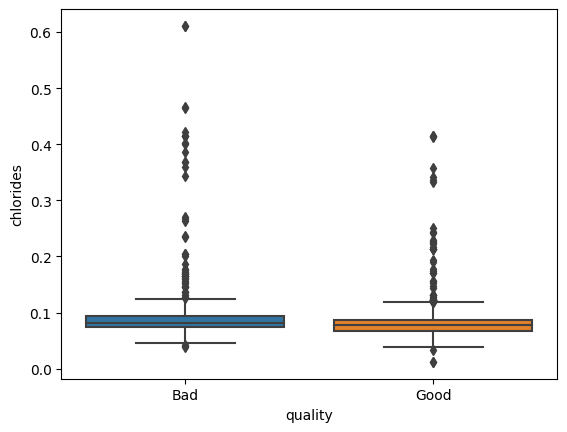

In [52]:
sns.boxplot(data=df,x='quality',y='chlorides')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

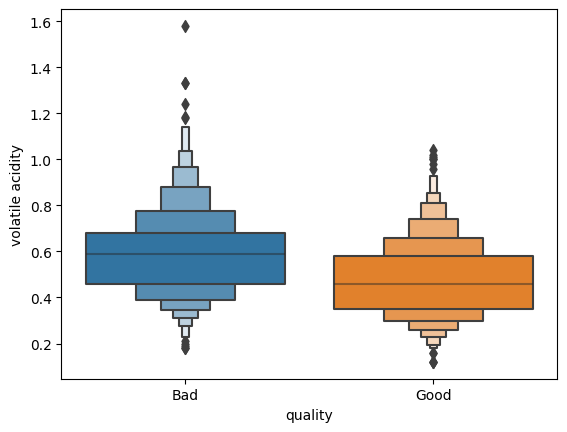

In [49]:
sns.boxenplot(data=df,x='quality',y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

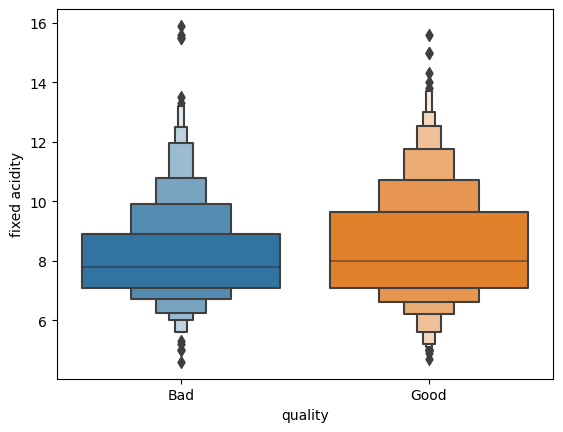

In [53]:
sns.boxenplot(data=df,x='quality',y='fixed acidity')

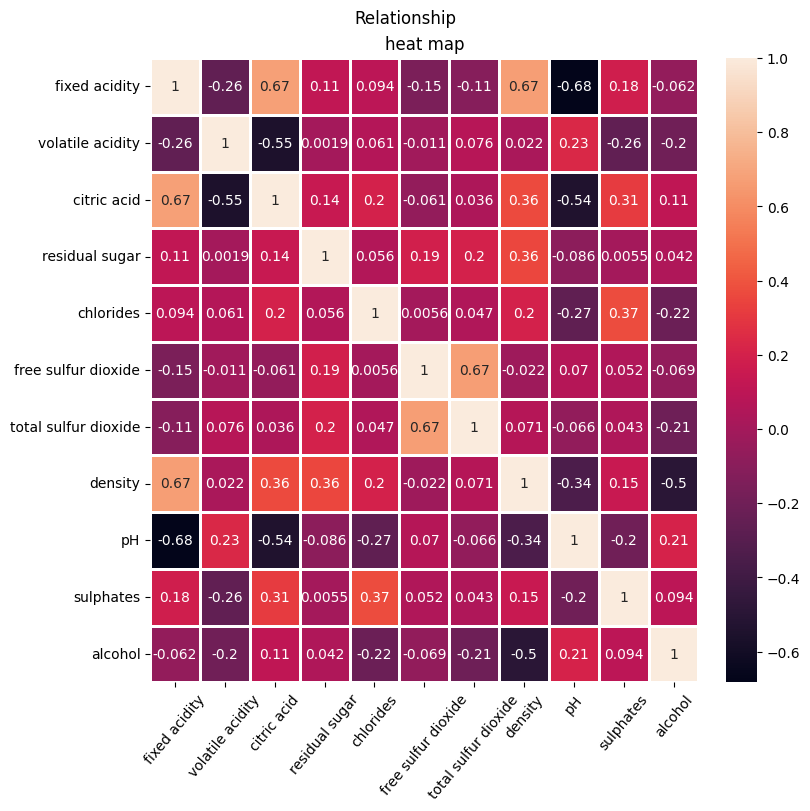

In [54]:
fig, axes = plt.subplots( figsize=(8,8), constrained_layout=True)
fig.suptitle("Relationship")
axes.set_title("heat map")
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True,linewidths=1.8)
plt.xticks(rotation=50)
plt.show()